In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Unemployment in India.csv")
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


# Data Cleaning and Exploring 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.columns = df.columns.str.strip()

In [7]:
# Handling missing values
df.dropna(inplace=True)

# Sum of missing values
df.isnull().sum()


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

# EDA

C:\Users\Gwen\AppData\Local\Temp\ipykernel_23928\463535.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df, ci=None, palette="magma")
C:\Users\Gwen\AppData\Local\Temp\ipykernel_23928\463535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df, ci=None, palette="magma")


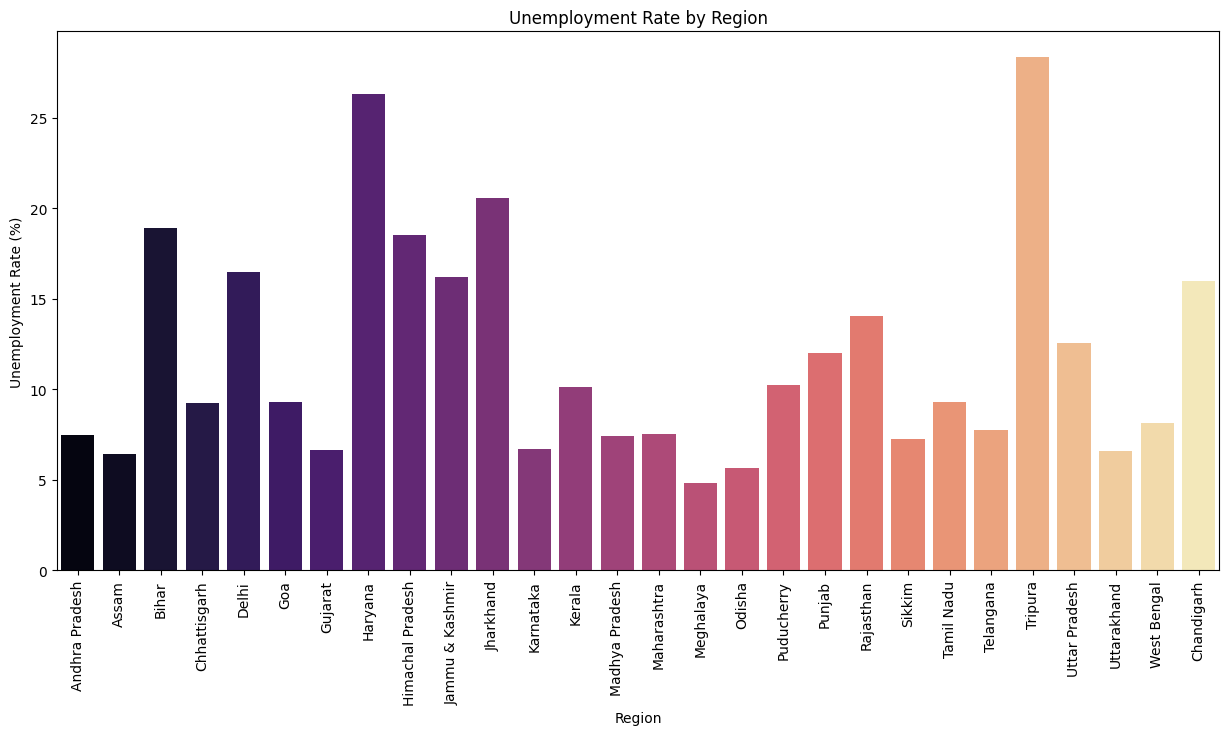

In [8]:
# Unemployment Rate Distribution by Region
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df, ci=None, palette="magma")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()


C:\Users\Gwen\AppData\Local\Temp\ipykernel_23928\3072454887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "Region", y="Estimated Labour Participation Rate (%)", data=df, palette="Spectral")


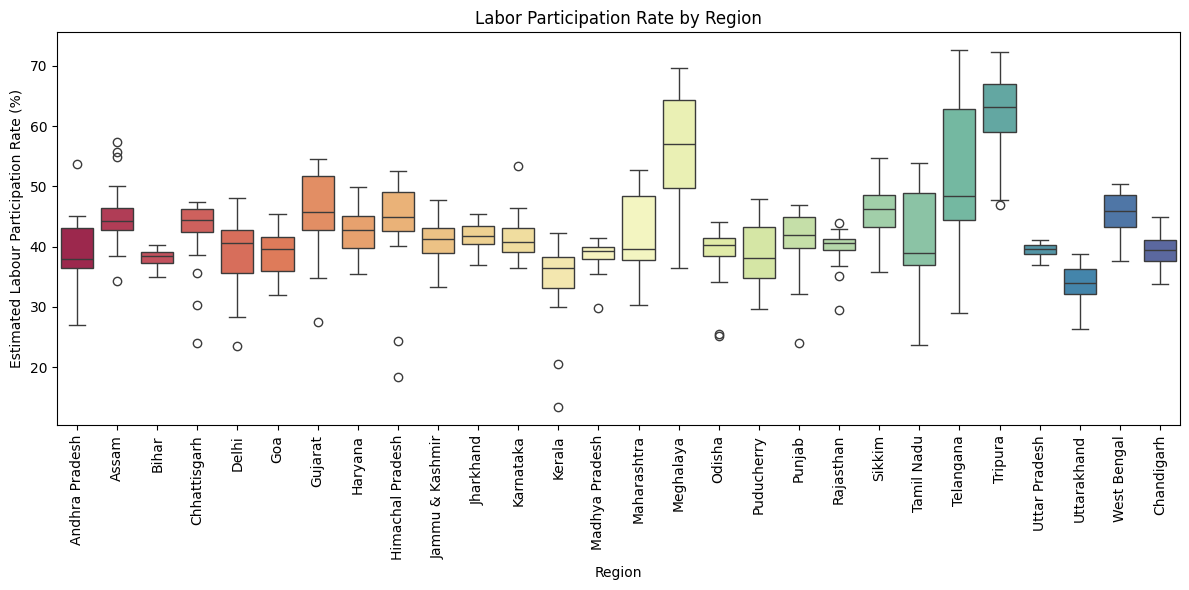

In [9]:
# Box Plot for Labor Participation Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x= "Region", y="Estimated Labour Participation Rate (%)", data=df, palette="Spectral")
plt.title("Labor Participation Rate by Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Converting Date 

df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

df['month_int']=df['Date'].dt.month
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


In [11]:
#Unemployment Rate before and after lockdown

after_lockdown = df[(df['month_int'] >= 4) & (df['month_int'] <=6)]
before_lockdown = df[(df['month_int'] >= 1) & (df['month_int'] <=4)]


af_lockdown=after_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
lockdown= before_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['Estimated Unemployment Rate (%)']

lockdown.columns=['region','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,region,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,10.756250,11.126000
1,Assam,6.750000,6.563333
2,Bihar,23.690000,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,9.028750,12.720000


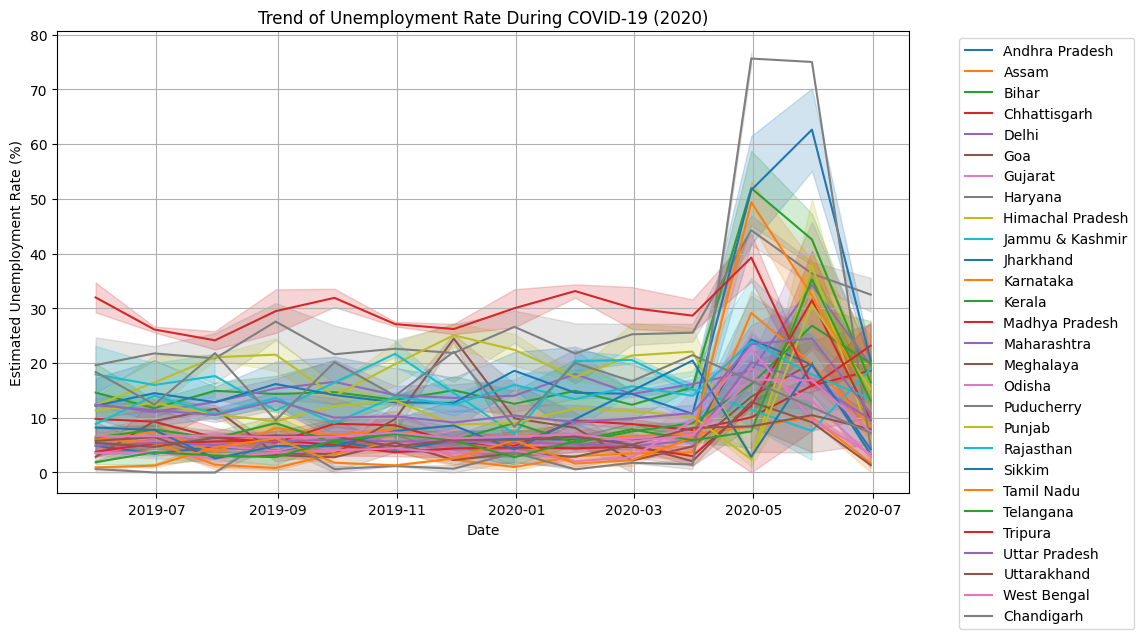

In [12]:
# Trend of Unemployment Rate During COVID-19

plt.figure(figsize=(11, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', palette='tab10')
plt.title("Trend of Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)

# Move the legend to the right of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

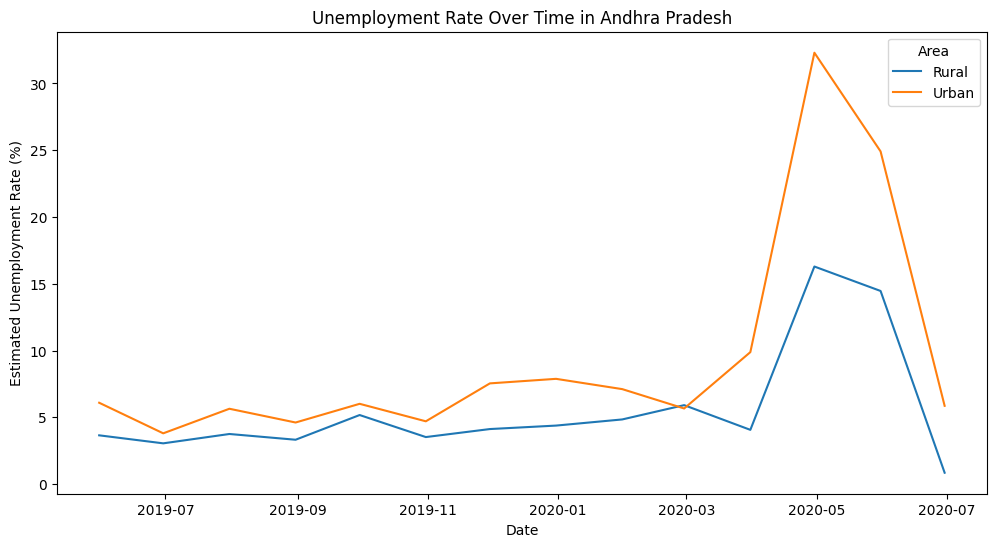

In [13]:
# Line plot of unemployment rate over time for a specific region (Andhra Pradesh)
andhra_pradesh_data = df[df['Region'] == 'Andhra Pradesh']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=andhra_pradesh_data, hue='Area')
plt.title('Unemployment Rate Over Time in Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

C:\Users\Gwen\AppData\Local\Temp\ipykernel_23928\271176412.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')


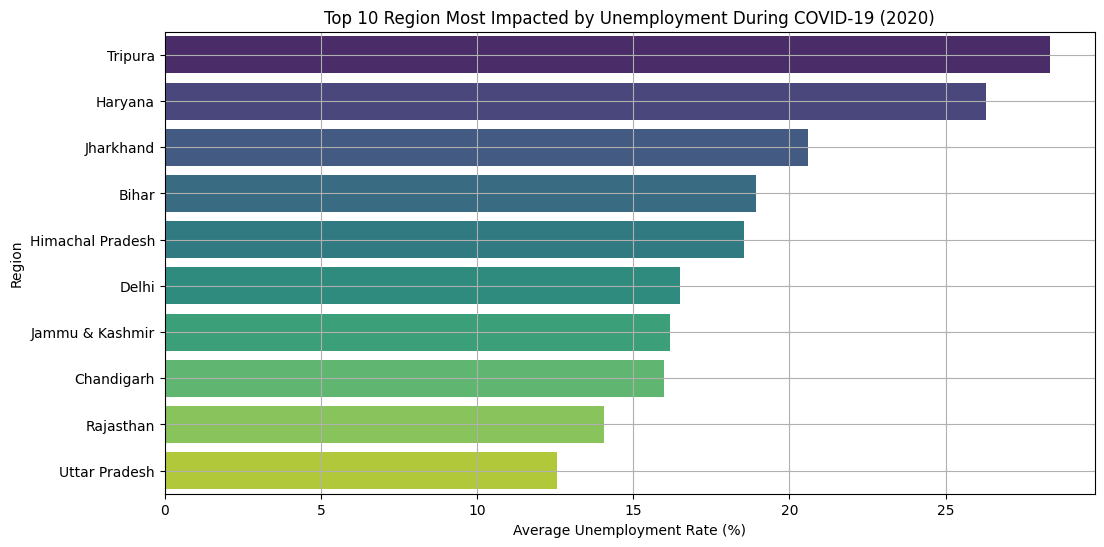

In [15]:
#Region most impacted by unemployment during COVID-19

region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')
plt.title("Top 10 Region Most Impacted by Unemployment During COVID-19 (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Region")
plt.grid(True)
plt.show()